## Convolutional Neural Networks

An automated learning process most commonly applied to analyzing visual imagery. Creating models that can identify objects in images. 

### How CNN Differs from Previous Classification Models 

### Process of Creating a CNN Model

* Collect many images of like size
* Split images into training and test sets
* Discover potential labels / features
* Flatten image into a tensor
* Increase hidden units: Add weightings to get desired output
* Try different activation functions: Helps decide what data is most important
* Try different optimization functions: Optimize by smoothing data to expected results
* Increase learning rate: How much to change the model based on estimated error
* Fit longer: Increase the number of times we try to fit the data

|  Hyperparameter  |  CNN  |    |
| :---: | :---: | :---: |
| Input Layer | Processing Images |
| Convolutional Layer | Finds feature weightings | ConvXD |
| Activation | Finds what is most important and adds non-linearity | ReLU |
| Pooling Layer | Reduce dimensions of data by combining outputs | AvgPool2D & MaxPool2D |
| Fully Connected Layer | Connects every neuron in 1 layer to every neuron in another | Dense |
| Receptive Field | Each Neurons receives input from a restrictive area of previous layer |
| Output Layer | Takes features and outputs to target labels |
| Output Activation | Adds non-linearity to output | Sigmoid and Softmax |

### Imports 

In [23]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep learning api for creating Neural Networks 
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Scikit-learn: machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Used for accessing files and file names
import pathlib
import os

# used to downnload data
import zipfile

### Download Data

I'll be using the food dataset from Kaggle (https://www.kaggle.com/datasets/kmader/food41)

You can either put your images folder in the same directory as this file, or use Google Drive or other online storage options with Google Colab.

I split up images into training and testing folders with a separate folder for hotdog and pizza in each 800 of each in training and 200 in test. 

### Analyze Data

In [2]:
def display_random_image(dir, class_type):
    img_dir = dir + "/" + class_type
    files = os.listdir(img_dir)
    img_name = random.choice(files)
    img = plt.imread(img_dir + "/" + img_name)
    plt.imshow(img)
    plt.title(class_type)
    plt.axis("off")
    print(f"Image Shape: {img.shape}")

Image Shape: (512, 512, 3)


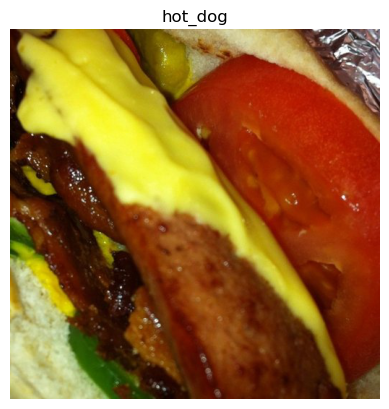

In [3]:
display_random_image("images/", "hot_dog")

### Understanding How CNNs Work

This is a fantastic site for understanding CNNs https://poloclub.github.io/cnn-explainer/

### Each Layer of the Network 

* Input Layer: Has 3 channels represented by RGB channels
* Convolutional Layer: Weights extract features that differentiate images
* Activation ReLU: Used to produce non-linear decision boundaries
* Pooling Layer: Summarizes feature maps
* Flatten Layer: Converts a 3D layer into a 1D vector.
* Activation Softmax: Softmax is used to scale from multiple tensors into output probabilities

### Understanding Hyperparameters

* **Filter**
* **Stride**
* **Pooling**

### Prepare Data

In [4]:
# 256x256 (Batches of 32 images)
data_dir = "images/"
training_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                           validation_split=0.2,
                                                           subset="training",
                                                           batch_size=32,
                                                           image_size=(256, 256),
                                                           seed=666)

validation_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                           validation_split=0.2,
                                                           subset="validation",
                                                           batch_size=32,
                                                           image_size=(256, 256),
                                                           seed=666)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


### Normalize the Data

In [5]:
class_names = training_data.class_names
print(class_names)

['hot_dog', 'pizza']


In [6]:
norm_layer = tf.keras.layers.Rescaling(1/255.)
training_data_norm = training_data.map(lambda x, y: (norm_layer(x), y))
validation_data_norm = validation_data.map(lambda x, y: (norm_layer(x), y))

In [7]:
image_batch, labels_batch = next(iter(training_data_norm))
image_batch[0]

2024-10-27 11:44:18.854191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1600]
	 [[{{node Placeholder/_4}}]]
2024-10-27 11:44:18.855190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1600]
	 [[{{node Placeholder/_4}}]]


<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.6343291 , 0.38334867, 0.2421722 ],
        [0.62992495, 0.37894458, 0.23487286],
        [0.6230776 , 0.37028953, 0.22398132],
        ...,
        [0.07496171, 0.08672641, 0.04358916],
        [0.07152268, 0.08328738, 0.04015012],
        [0.06862745, 0.08039216, 0.0372549 ]],

       [[0.6539369 , 0.40147826, 0.26817557],
        [0.6495328 , 0.39276198, 0.2564415 ],
        [0.64464617, 0.38582262, 0.2509804 ],
        ...,
        [0.07888328, 0.08672641, 0.04358916],
        [0.07544424, 0.08328738, 0.04015012],
        [0.07254902, 0.08039216, 0.0372549 ]],

       [[0.66473657, 0.402474  , 0.28730088],
        [0.65737593, 0.38935357, 0.27119333],
        [0.64766395, 0.3770757 , 0.25550705],
        ...,
        [0.12443322, 0.12292434, 0.09607844],
        [0.12642464, 0.12054229, 0.09215686],
        [0.12352942, 0.11764707, 0.08920037]],

       ...,

       [[0.05342372, 0.0926394 , 0.08871783],
        [0.05

### Try Non-CNN Model on Data

In [10]:
tf.random.set_seed(666)

model_1 = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_1 = model_1.fit(training_data_norm,
                       epochs=5,
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 0.7456 - accuracy: 0.5050

2024-10-27 11:51:00.483825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [400]
	 [[{{node Placeholder/_4}}]]
2024-10-27 11:51:00.484273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [400]
	 [[{{node Placeholder/_4}}]]


50/50 [==============================] - 12s 220ms/step - loss: 0.7456 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.4925
Epoch 2/5
50/50 [==============================] - 6s 99ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4925
Epoch 3/5
50/50 [==============================] - 5s 98ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4925
Epoch 4/5
50/50 [==============================] - 5s 92ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4925
Epoch 5/5
50/50 [==============================] - 5s 95ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4925


In [11]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_6 (Dense)             (None, 4)                 786436    
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


### Non-CNN Model with More Layers

In [12]:
tf.random.set_seed(666)

model_2 = Sequential([
    Flatten(input_shape=(256, 256, 3)),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(100, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_2 = model_2.fit(training_data_norm,
                       epochs=5,
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 34s 647ms/step - loss: 4.3456 - accuracy: 0.5731 - val_loss: 5.5900 - val_accuracy: 0.5075
Epoch 2/5
50/50 [==============================] - 30s 594ms/step - loss: 1.6291 - accuracy: 0.6294 - val_loss: 0.9508 - val_accuracy: 0.5925
Epoch 3/5
50/50 [==============================] - 31s 600ms/step - loss: 1.9255 - accuracy: 0.6313 - val_loss: 5.0271 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 30s 588ms/step - loss: 1.4279 - accuracy: 0.6112 - val_loss: 1.9845 - val_accuracy: 0.5100
Epoch 5/5
50/50 [==============================] - 31s 598ms/step - loss: 0.7038 - accuracy: 0.6963 - val_loss: 0.6534 - val_accuracy: 0.6975


In [13]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 196608)            0         
                                                                 
 dense_9 (Dense)             (None, 100)               19660900  
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 19,681,201
Trainable params: 19,681,201
Non-trainable params: 0
_________________________________________________________________


### Prepare CNN Model

In [14]:
len(training_data_norm), 1600/32

(50, 50.0)

In [16]:
model_3 = tf.keras.models.Sequential([
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_3 = model_3.fit(training_data_norm,
                       epochs=5,
                       steps_per_epoch=len(training_data_norm),
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 171s 3s/step - loss: 1.4103 - accuracy: 0.4844 - val_loss: 0.6936 - val_accuracy: 0.4825
Epoch 2/5
50/50 [==============================] - 170s 3s/step - loss: 0.6396 - accuracy: 0.6644 - val_loss: 0.6691 - val_accuracy: 0.6300
Epoch 3/5
50/50 [==============================] - 164s 3s/step - loss: 0.5545 - accuracy: 0.7225 - val_loss: 0.5830 - val_accuracy: 0.7000
Epoch 4/5
50/50 [==============================] - 183s 4s/step - loss: 0.3722 - accuracy: 0.8506 - val_loss: 0.6051 - val_accuracy: 0.7050
Epoch 5/5
50/50 [==============================] - 170s 3s/step - loss: 0.1512 - accuracy: 0.9606 - val_loss: 0.7184 - val_accuracy: 0.7350


### Breakdown of Conv2D

### Plot Loss and Accuracy

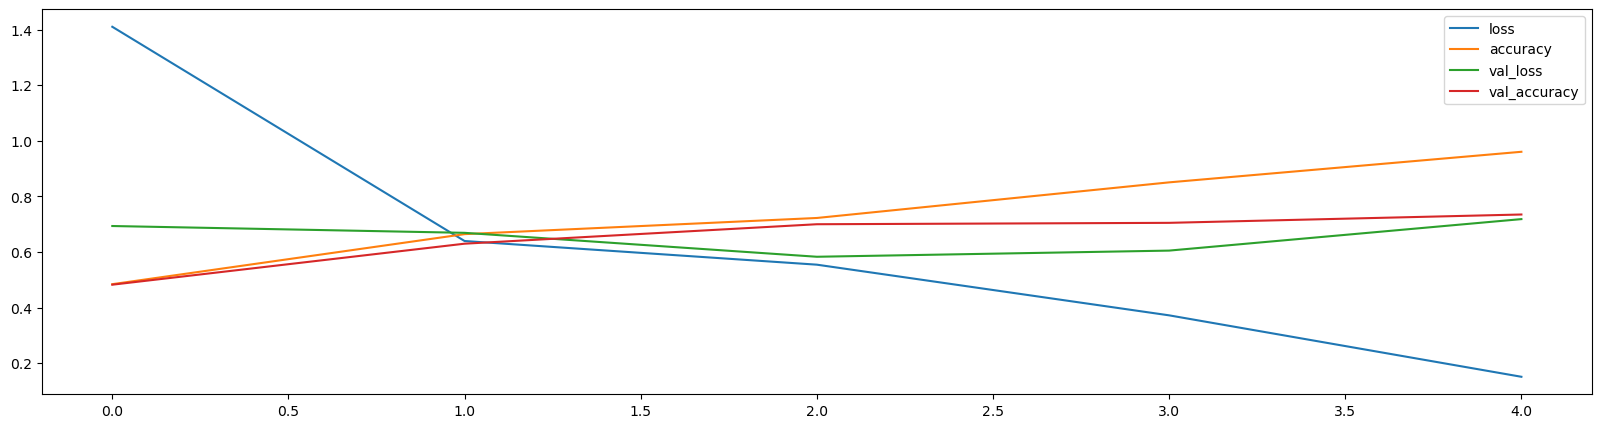

In [18]:
pd.DataFrame(history_3.history).plot(figsize=(20, 5))
plt.show()

### Reduce Overfitting with Pooling

In [19]:
model_4 = tf.keras.models.Sequential([
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    MaxPool2D(pool_size=(2,2),
             padding="valid"),
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    MaxPool2D(),
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_4 = model_4.fit(training_data_norm,
                       epochs=5,
                       steps_per_epoch=len(training_data_norm),
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/5
50/50 [==============================] - 58s 1s/step - loss: 0.6701 - accuracy: 0.5494 - val_loss: 0.6115 - val_accuracy: 0.6825
Epoch 2/5
50/50 [==============================] - 58s 1s/step - loss: 0.5799 - accuracy: 0.7138 - val_loss: 0.5275 - val_accuracy: 0.7550
Epoch 3/5
50/50 [==============================] - 56s 1s/step - loss: 0.4744 - accuracy: 0.7869 - val_loss: 0.4866 - val_accuracy: 0.7750
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 0.4360 - accuracy: 0.8050 - val_loss: 0.5004 - val_accuracy: 0.7700
Epoch 5/5
50/50 [==============================] - 60s 1s/step - loss: 0.3440 - accuracy: 0.8581 - val_loss: 0.4755 - val_accuracy: 0.8025


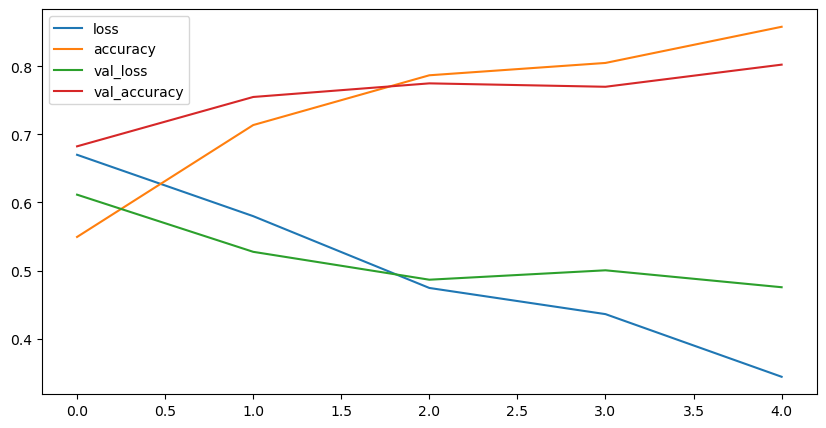

In [21]:
pd.DataFrame(history_4.history).plot(figsize=(10, 5))
plt.show()

### Add more Data with Augmentation to Avoid Overfitting

In [24]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [26]:
model_5 = tf.keras.models.Sequential([
    data_augmentation,
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    MaxPool2D(pool_size=(2,2),
             padding="valid"),
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    MaxPool2D(),
    Conv2D(filters=10, 
          kernel_size=(3,3),
          activation="relu",
          input_shape=(256, 256, 3)),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_5 = model_5.fit(training_data_norm,
                       epochs=10,
                       steps_per_epoch=len(training_data_norm),
                       validation_data=validation_data_norm,
                       validation_steps=len(validation_data_norm))

Epoch 1/10
50/50 [==============================] - 79s 2s/step - loss: 0.6204 - accuracy: 0.6575 - val_loss: 0.5572 - val_accuracy: 0.7175
Epoch 2/10
50/50 [==============================] - 72s 1s/step - loss: 0.5933 - accuracy: 0.6762 - val_loss: 0.5515 - val_accuracy: 0.7200
Epoch 3/10
50/50 [==============================] - 70s 1s/step - loss: 0.5596 - accuracy: 0.7200 - val_loss: 0.4978 - val_accuracy: 0.7600
Epoch 4/10
50/50 [==============================] - 71s 1s/step - loss: 0.5518 - accuracy: 0.7387 - val_loss: 0.4950 - val_accuracy: 0.7750
Epoch 5/10
50/50 [==============================] - 70s 1s/step - loss: 0.5192 - accuracy: 0.7425 - val_loss: 0.4748 - val_accuracy: 0.7600
Epoch 6/10
50/50 [==============================] - 93s 2s/step - loss: 0.5196 - accuracy: 0.7538 - val_loss: 0.4433 - val_accuracy: 0.7800
Epoch 7/10
50/50 [==============================] - 76s 2s/step - loss: 0.4673 - accuracy: 0.7850 - val_loss: 0.4157 - val_accuracy: 0.8100
Epoch 8/10
50/50 [==

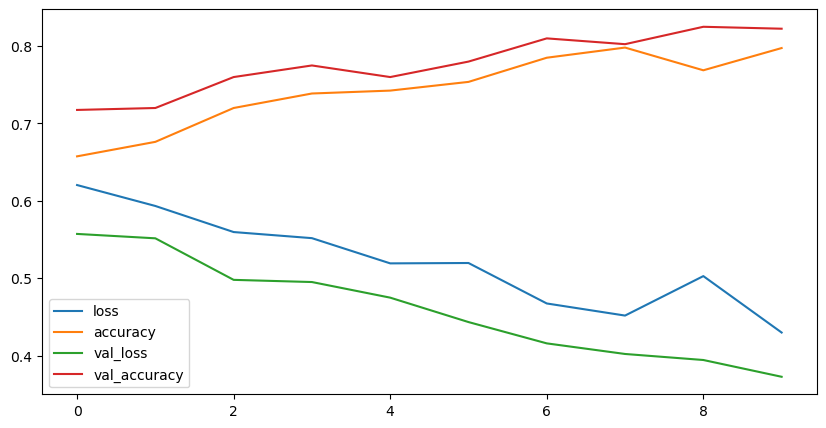

In [27]:
pd.DataFrame(history_5.history).plot(figsize=(10, 5))
plt.show()

Overfitting problem solved! When the validation accuracy is more than training accuracy, and validation loss is lower than training loss, then we can say that overfitting problem is solved!

### How can we Further Improve Accuracy?

* Increase the number of model layers(e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more date (give the model more opportunities to learn).

### Make Prediction using Custom Image

In [39]:
import matplotlib.image as mpimg
my_pizza = mpimg.imread("test-pizza.jpg")
my_pizza

array([[[252, 250, 253],
        [252, 250, 253],
        [252, 250, 253],
        ...,
        [253, 251, 254],
        [253, 251, 254],
        [253, 251, 254]],

       [[252, 250, 253],
        [252, 250, 253],
        [252, 250, 253],
        ...,
        [253, 251, 254],
        [253, 251, 254],
        [253, 251, 254]],

       [[252, 250, 253],
        [252, 250, 253],
        [252, 250, 253],
        ...,
        [253, 251, 254],
        [253, 251, 254],
        [253, 251, 254]],

       ...,

       [[254, 252, 255],
        [254, 252, 255],
        [254, 252, 255],
        ...,
        [254, 252, 255],
        [254, 252, 255],
        [254, 252, 255]],

       [[254, 252, 255],
        [254, 252, 255],
        [254, 252, 255],
        ...,
        [254, 252, 255],
        [254, 252, 255],
        [254, 252, 255]],

       [[254, 252, 255],
        [254, 252, 255],
        [254, 252, 255],
        ...,
        [254, 252, 255],
        [254, 252, 255],
        [254, 252, 255]]

(-0.5, 639.5, 639.5, -0.5)

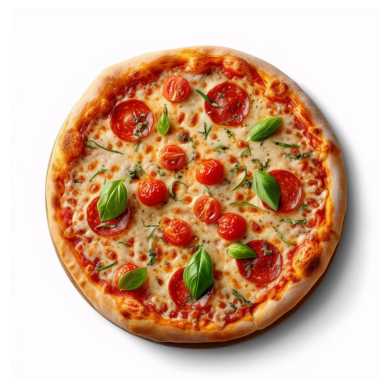

In [40]:
plt.imshow(my_pizza)
plt.axis(False)

### Normalize and Resize

In [44]:
my_pizza = tf.io.read_file("test-pizza.jpg")
my_pizza = tf.image.decode_image(my_pizza)
my_pizza = tf.image.resize(my_pizza, size=[256, 256])
my_pizza = my_pizza / 255
my_pizza

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.9872549 , 0.9794118 , 0.9911765 ],
        [0.9872549 , 0.9794118 , 0.9911765 ],
        [0.9872549 , 0.9794118 , 0.9911765 ],
        ...,
        [0.9882353 , 0.98039216, 0.99215686],
        [0.9882353 , 0.98039216, 0.99215686],
        [0.9882353 , 0.98039216, 0.99215686]],

       [[0.9882353 , 0.98039216, 0.99215686],
        [0.9882353 , 0.98039216, 0.99215686],
        [0.9882353 , 0.98039216, 0.99215686],
        ...,
        [0.99215686, 0.9843137 , 0.99607843],
        [0.99215686, 0.9843137 , 0.99607843],
        [0.99215686, 0.9843137 , 0.99607843]],

       [[0.99215686, 0.9843137 , 0.99607843],
        [0.99215686, 0.9843137 , 0.99607843],
        [0.99215686, 0.9843137 , 0.99607843],
        ...,
        [0.99509805, 0.9872549 , 0.9990196 ],
        [0.99509805, 0.9872549 , 0.9990196 ],
        [0.99509805, 0.9872549 , 0.9990196 ]],

       ...,

       [[0.99607843, 0.9882353 , 1.        ],
        [0.99

In [45]:
prediction = model_5.predict(tf.expand_dims(my_pizza, axis=0))
prediction

1/1 [==============================] - 0s 273ms/step


array([[0.97549945]], dtype=float32)

In [46]:
class_names  # 0 is hot dog and 1 is pizza

['hot_dog', 'pizza']

In [48]:
predicted_class = class_names[int(tf.round(prediction))]
predicted_class

'pizza'

### Save and Load Model

In [49]:
model_5.save("Binary_CNN_Model_5")

2024-10-27 14:21:04.715507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_flip_input' with dtype float and shape [?,256,256,3]
	 [[{{node random_flip_input}}]]
2024-10-27 14:21:04.903642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256,256,3]
	 [[{{node inputs}}]]
2024-10-27 14:21:04.937498: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'random_flip_input' with dtype float and shape [

INFO:tensorflow:Assets written to: Binary_CNN_Model_5/assets


INFO:tensorflow:Assets written to: Binary_CNN_Model_5/assets


In [50]:
saved_model_5 = tf.keras.models.load_model("Binary_CNN_Model_5")
saved_model_5.evaluate(validation_data_norm)

13/13 [==============================] - 11s 672ms/step - loss: 0.3726 - accuracy: 0.8225


[0.37255382537841797, 0.8224999904632568]